<a href="https://colab.research.google.com/github/AishaMAliyu/Click-on-Kd/blob/main/Web_Scrapping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd #spreadsheet
import requests #get request
from bs4 import BeautifulSoup as soup #html parser
import urllib.request as urequest

In [8]:
url='https://en.wikipedia.org/wiki/HIV/AIDS_in_Africa'

In [9]:
request = urequest.Request(url)

In [10]:
# opening the url

response = urequest.urlopen(request)

In [11]:
data_HIV_AIDS = response.read()
print(data_HIV_AIDS)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>HIV/AIDS in Africa - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-

In [12]:
page = soup(data_HIV_AIDS, 'html.parser')
print(page)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>HIV/AIDS in Africa - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vec

In [13]:
data = page.find_all('table', {'class':'wikitable'})
# display no of table
print(f'Number of wikitable tables found: {len(data)}')
# convert the first table to a Dataframe
if data:
    table=data[0] # Access the first wikitable
    df=pd.read_html(str(table)) # Use pd t

Number of wikitable tables found: 8


<ipython-input-13-a245a6693d96>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(table)) # Use pd t


In [14]:
df[0]

,World region,Adult HIV prevalence (ages 15–49)[13],Persons living with HIV[13],"AIDS deaths, annual[13]","New HIV infections, annual[14]"
0,Worldwide,0.8%,34000000,1700000,2500000
1,Sub-Saharan Africa,4.9%,23500000,1200000,1800000
2,South and Southeast Asia,0.3%,4000000,250000,280000
3,Eastern Europe and Central Asia,1.0%,1400000,92000,140000
4,East Asia,0.1%,830000,59000,89000
5,Latin America,0.4%,1400000,54000,83000
6,Middle East and North Africa,0.2%,300000,23000,37000
7,North America,0.6%,1400000,21000,51000
8,Caribbean,1.0%,230000,10000,13000
9,Western and Central Europe,0.2%,900000,7000,30000


In [15]:
# Access the first dataframe from the list of dataframes returned by read_html
data_frame = df[0]

In [16]:
print(data_frame.columns)

Index(['World region', 'Adult HIV prevalence (ages 15–49)[13]',
       'Persons living with HIV[13]', 'AIDS deaths, annual[13]',
       'New HIV infections, annual[14]'],
      dtype='object')


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns



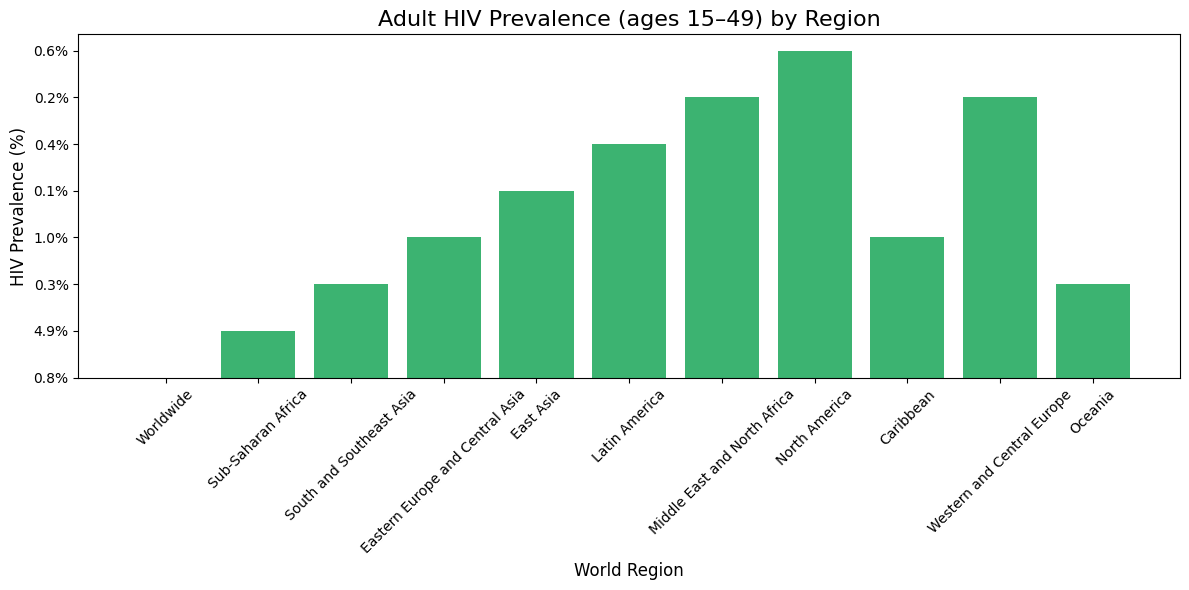

In [19]:
# Visualization: Adult HIV Prevalence by Region
plt.figure(figsize=(12, 6))

regions = data_frame["World region"]
prevalence = data_frame["Adult HIV prevalence (ages 15–49)[13]"]

plt.bar(regions, prevalence, color="mediumseagreen")
plt.title("Adult HIV Prevalence (ages 15–49) by Region", fontsize=16)
plt.xlabel("World Region", fontsize=12)
plt.ylabel("HIV Prevalence (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Sub-Saharan Africa stands out with a prevalence of 4.9%, significantly higher than all other regions.
Most regions, including East Asia, Western and Central Europe, and the Middle East and North Africa, report low prevalence (<0.5%).

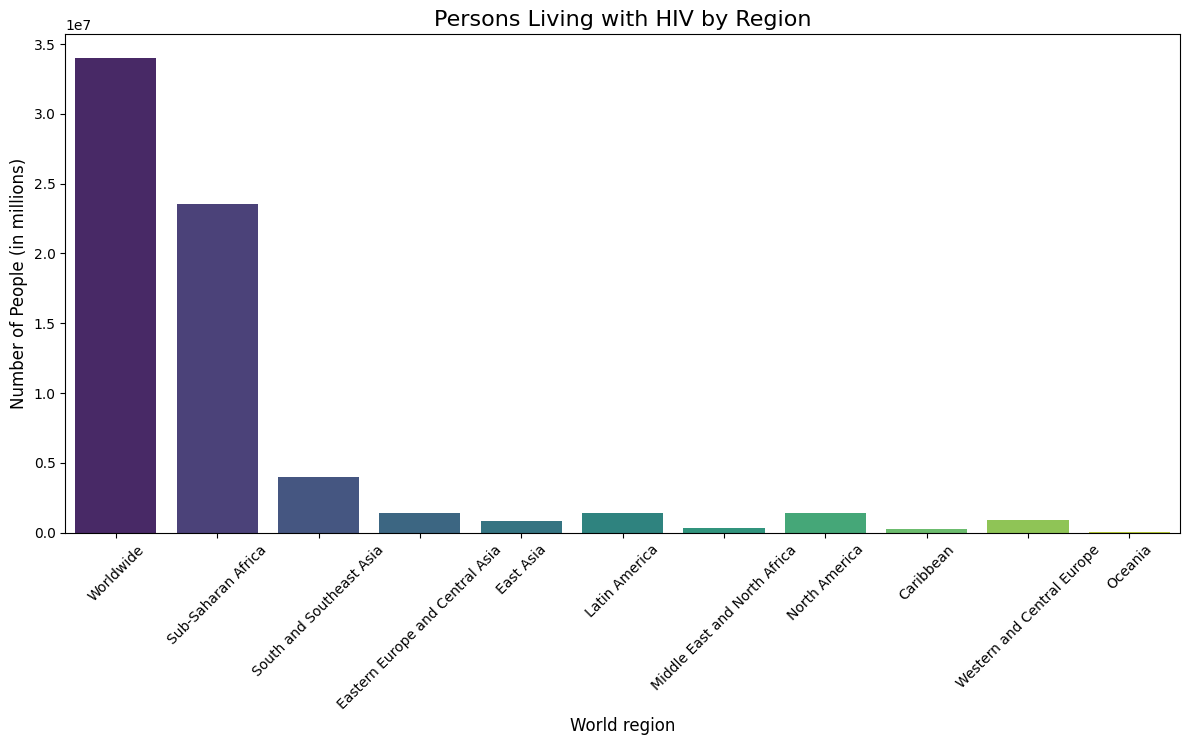

In [20]:
# Visualization: Persons Living with HIV by Region

plt.figure(figsize=(12, 6))

sns.barplot(data=data_frame, x="World region", y="Persons living with HIV[13]", hue="World region", palette="viridis")
plt.title("Persons Living with HIV by Region", fontsize=16)
plt.xlabel("World region", fontsize=12)
plt.ylabel("Number of People (in millions)", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
legend = False
plt.show()

Sub-Saharan Africa dominates with 23.5 million people living with HIV, far exceeding other regions.
South and Southeast Asia and North America follow, with about 4 million and 1.4 million, respectively.
Oceania reports the lowest number of persons living with HIV (53,000).

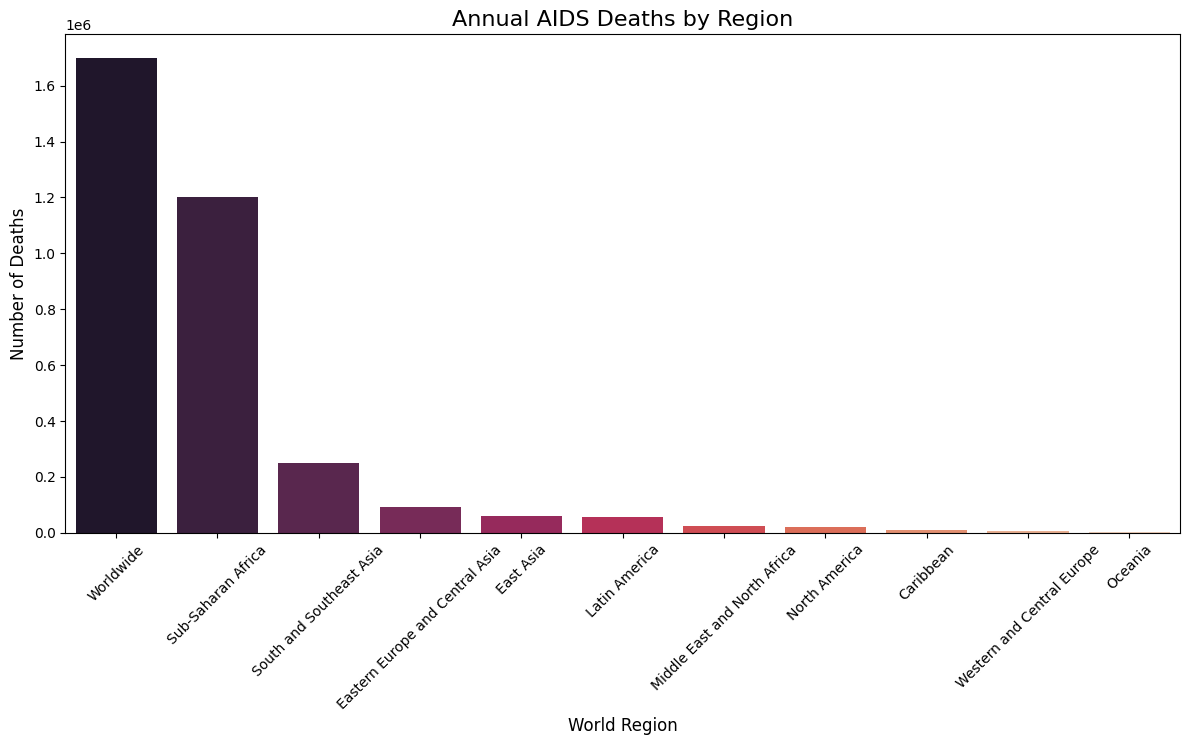

In [21]:
# Visualization: Annual AIDS Deaths by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=data_frame, x="World region", y="AIDS deaths, annual[13]", hue= "World region",palette="rocket")
plt.title("Annual AIDS Deaths by Region", fontsize=16)
plt.xlabel("World Region", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
legend = False
plt.show()

Sub-Saharan Africa has the highest number of AIDS-related deaths annually (1.2 million), reflecting the region's significant burden of HIV/AIDS.
Other regions, such as Oceania and Western and Central Europe, report relatively low mortality rates.


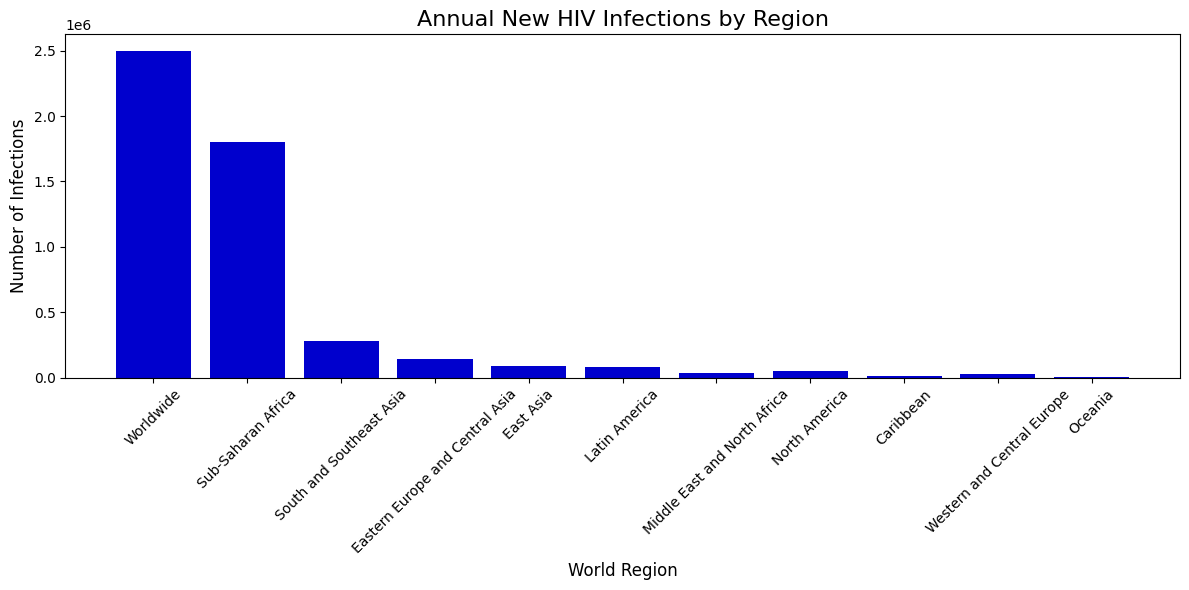

In [22]:
# Visualization: New HIV Infections by Region
plt.figure(figsize=(12, 6))

regions = data_frame["World region"]
prevalence = data_frame["New HIV infections, annual[14]"]

plt.bar(regions, prevalence, color="mediumblue")
plt.title("Annual New HIV Infections by Region", fontsize=16)
plt.xlabel("World Region", fontsize=12)
plt.ylabel("Number of Infections", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()



Sub-Saharan Africa again leads with 1.8 million new infections annually.
South and Southeast Asia also have a substantial number of new infections (280,000), while Oceania has the lowest (2,900).